In [34]:
%matplotlib inline
import math
import pandas as pd
from tsmom_model import *
import numpy as np
from datetime import datetime

token="Us3wFmXGgAj_1cUtHAAR"

import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

# Hand cleansed
Hand cleaned to removed duplicates

In [35]:
cleansed=load_amihud_markets_price()

In [36]:
cleansed.count().count()

123

# Amihud methodology

Amihud (2002) developed the illiquidity measure expressed by:

$$ Amihud = \frac{|r_t|}{\text{volume}_t} $$

where $r_t$ is the return on day $t$ and $Volume_t$ is the dollar volume on day $t$. 

The benefit of taking the daily return is to weight the move by change of price and the volume.


In [37]:
amihud=calculate_amihud_liquidity(cleansed)[:'2016'] 

In [38]:
df=pd.DataFrame()
d_map=sector_map(amihud)
for sect in d_map.keys():
    df[sect]=amihud[d_map[sect]].median(axis=1)

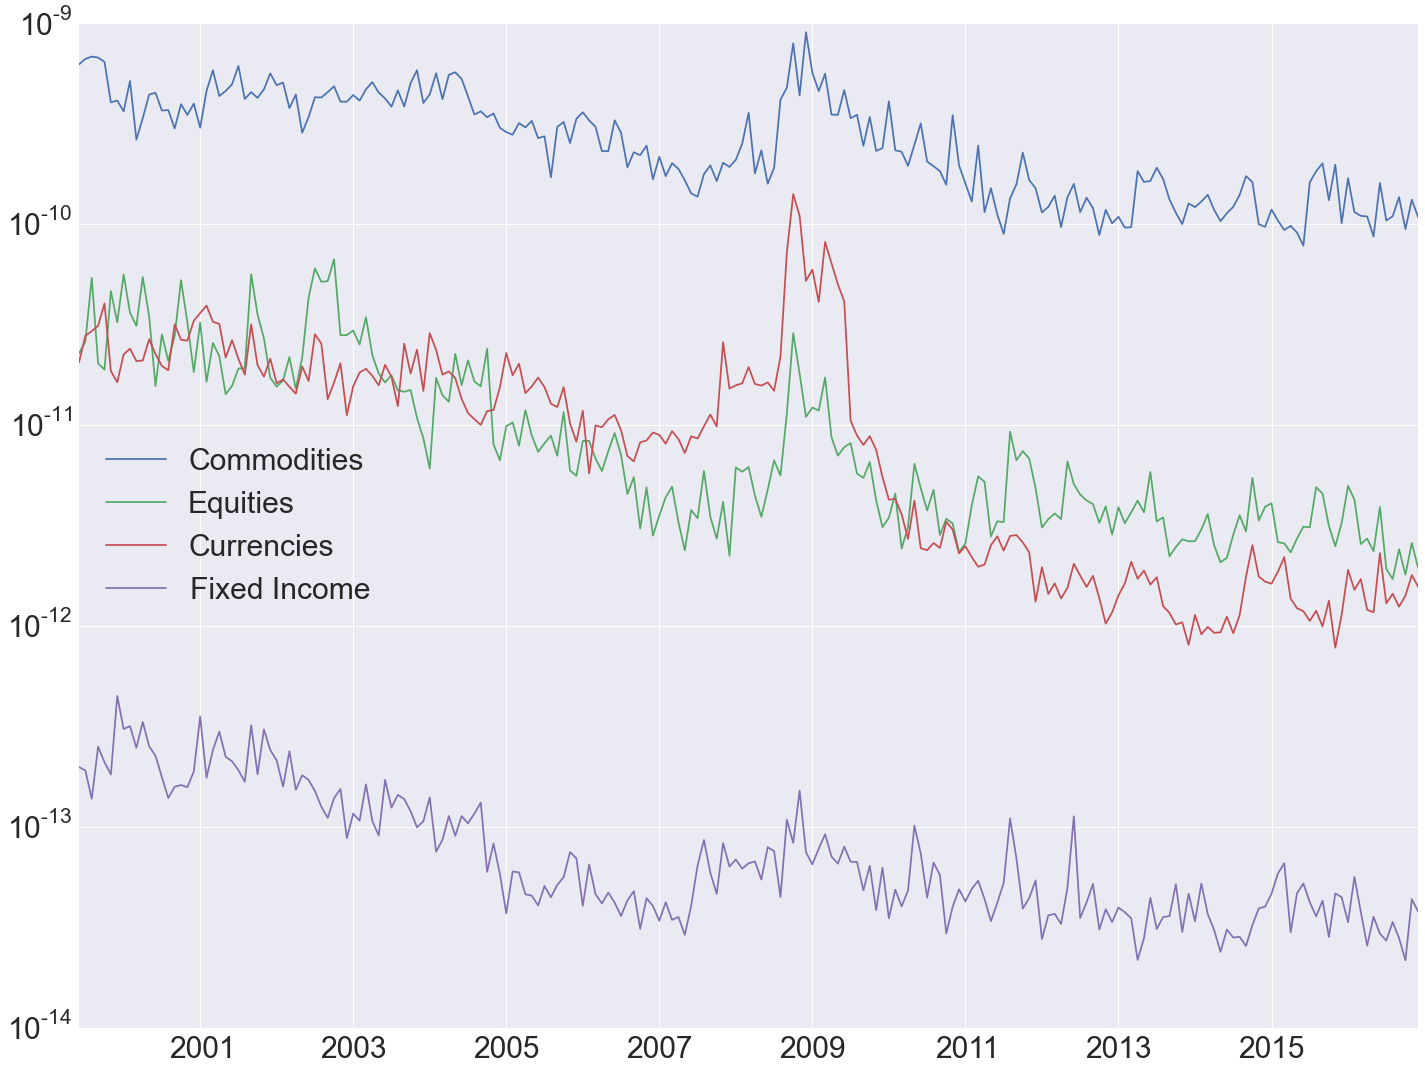

In [39]:
df.dropna().plot(logy=True)

In [12]:
df.columns

Index([u'Commodities', u'Equities', u'Currencies', u'Fixed Income'], dtype='object')

In [13]:
mp =load_maps()
s = pd.Series()
for sect in mp.Sector.unique():
    s[sect]= mp[mp.Sector==sect].Sector.count()

In [14]:
res=pd.DataFrame()
res['Mean']=df.mean()*1e13
res['Standard Deviation']=df.std()*1e13
res['Skew']=df.skew()
res['Kurtosis']=df.kurt()
res['Number of Markets']=s

In [15]:
print res.to_latex()

\begin{tabular}{lrrrrr}
\toprule
{} &         Mean &  Standard Deviation &  Skew &  Kurtosis &  Number of Markets \\
\midrule
Commodities  &  2858.823052 &         1620.978327 &   0.0 &       0.0 &                 76 \\
Equities     &   118.477147 &          130.707109 &   0.0 &       0.0 &                 29 \\
Currencies   &   137.153551 &          172.952374 &   0.0 &       0.0 &                  8 \\
Fixed Income &     0.893606 &            0.751524 &   0.0 &       0.0 &                 32 \\
\bottomrule
\end{tabular}



In [32]:
res.to_csv('amihud.csv')

In [44]:
df.dropna().to_csv('amihud_ts.csv')